In [1]:
%matplotlib inline

In [2]:
from matplotlib.patches import Ellipse
from matplotlib import pyplot as plt
import numpy as np
import pymc3 as pm
import scipy as sp
import seaborn as sns
from theano import tensor as T
import theano

/home/mudigonda/Tools/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
np.random.seed(3264602) # from random.org


In [4]:
N = 100

mu_actual = sp.stats.uniform.rvs(-5, 10, size=2)

cov_actual_sqrt = sp.stats.uniform.rvs(0, 2, size=(2, 2))
cov_actual = np.dot(cov_actual_sqrt.T, cov_actual_sqrt)

x = sp.stats.multivariate_normal.rvs(mu_actual, cov_actual, size=N)


In [5]:
var, U = np.linalg.eig(cov_actual)
angle = 180. / np.pi * np.arccos(np.abs(U[0, 0]))

/home/mudigonda/Tools/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


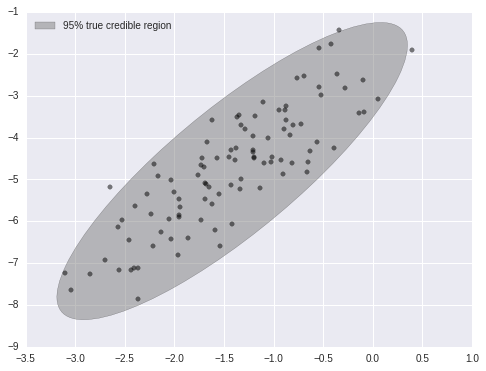

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))

blue = sns.color_palette()[0]

e = Ellipse(mu_actual, 2 * np.sqrt(5.991 * var[0]), 2 * np.sqrt(5.991 * var[1]), angle=-angle)
e.set_alpha(0.5)
e.set_facecolor('gray')
e.set_zorder(10);
ax.add_artist(e);

ax.scatter(x[:, 0], x[:, 1], c='k', alpha=0.5, zorder=11);

rect = plt.Rectangle((0, 0), 1, 1, fc='gray', alpha=0.5)
ax.legend([rect], ['95% true credible region'], loc=2);

In [8]:
with pm.Model() as model:
    mu = pm.Deterministic('mu',theano.shared(mu_actual))
    tau = pm.Deterministic('tau',theano.shared(np.linalg.inv(cov_actual)))
    x_ = pm.MvNormal('x',mu=mu,tau=tau)
    

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
n_samples = 4000
n_burn = 2000
n_thin = 2

In [ ]:
with model:
    step = pm.Metropolis()
    trace_ = pm.sample(n_samples, step)